# Technical Analisis - Indicators

To choose our set of technical indicators, we are going to compare the correlation of all possible indicators (?? features) provided by `talib` and `ta` libraries. We use pandas to find the correlation between each indicator of the same type (momentum, volume, trend, volatility), then select only the least correlated indicators from each type to use as features. That way, we can get as much benefit out of these technical indicators as possible, without adding too much noise to our observation space.

In [1]:
# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (7,5)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import DateFormatter
from datetime import datetime

In [5]:
import talib, ta

In [6]:
def plot_correlation(dataframe, filename=None, title='', corr_type=''):
    """
    This function gets a Pandas dataframe containing a correlation 
    matrix and plots a heatmap figure of the correlations
    The plot is prompted and saved in a file as well
    Inputs:
        dataframe = correlation matrix
        filename = external filename to save figure
        title = title of the figure
        corr_type = type of correlation coefficient
    """
    
    lang_names = dataframe.columns.tolist()
    tick_indices = np.arange(0.5, len(lang_names) + 0.5)
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.pcolor(dataframe.values, cmap='seismic', vmin=-1, vmax=1)
    #plt.matshow(dataframe, vmin=-1, vmax=1, cmap='seismic')
    colorbar = plt.colorbar()
    colorbar.set_label(corr_type)

    plt.title(title)
    plt.xticks(tick_indices, lang_names, rotation='vertical')
    plt.yticks(tick_indices, lang_names)
    
    if filename is not None:
        plt.savefig(filename)        
        plt.show()

In [7]:
def create_features(df):
    """
    Function that creates the set of features.
    Makes use of TA-lib and ta to define the different indicators.

    :param dataset: (dataframe) with bars data in OCHL format
    :output dataset: (dataframe) with constructed features and target variable (classes)
    """

    # Momentum Indicator Functions
    momentum_df = pd.DataFrame()

    momentum_df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'])
    momentum_df['ADXR'] = talib.ADXR(df['High'], df['Low'], df['Close'])
    momentum_df['APO'] = talib.APO(df['Close'])
    momentum_df['AROONDOWN'], df['AROONUP'] = talib.AROON(df['High'], df['Low'])
    momentum_df['AROONOSC'] = talib.AROONOSC(df['High'], df['Low'])
    momentum_df['BOP'] = talib.BOP(df['Open'], df['High'], df['Low'], df['Close'])
    momentum_df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'])
    momentum_df['CMO'] = talib.CMO(df['Close'])
    momentum_df['DX'] = talib.DX(df['High'], df['Low'], df['Close'])
    momentum_df['MACD'], df['MACDSIGNAL'], df['MACDHIST'] = talib.MACD(df['Close'])
    momentum_df['MFI'] = talib.MFI(df ['High'], df['Low'], df['Close'], df['Volume'])
    momentum_df['MINUS_DI'] = talib.MINUS_DI(df['High'], df['Low'], df['Close'])
    momentum_df['MINUS_DM'] = talib.MINUS_DM(df['High'], df['Low'])
    momentum_df['MOM'] = talib.MOM(df['Close'])
    momentum_df['PLUS_DI'] = talib.PLUS_DI(df['High'], df['Low'], df['Close'])
    momentum_df['PLUS_DM'] = talib.PLUS_DM(df['High'], df['Low'])
    momentum_df['PPO'] = talib.PPO(df['Close'])
    momentum_df['ROC'] = talib.ROC(df['Close'])
    momentum_df['ROCP'] = talib.ROCP(df['Close'])
    momentum_df['ROCR'] = talib.ROCR(df['Close'])
    momentum_df['RSI'] = talib.RSI(df['Close'])
    momentum_df['SLOWK'], df['SLOWD'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    momentum_df['FASTK'], df['FASTD'] = talib.STOCHF(df['High'], df['Low'], df['Close'])
    momentum_df['TRIX'] = talib.TRIX(df['Close'])
    momentum_df['ULTOSC'] = talib.ULTOSC(df['High'], df['Low'], df['Close'])
    momentum_df['WILLR'] = talib.WILLR(df['High'], df['Low'], df['Close'])
    momentum_df['TSI'] = ta.momentum.tsi(df['Close'])
    momentum_df['UO'] = ta.momentum.uo(df['High'], df['Low'], df['Close'])
    momentum_df['AO'] = ta.momentum.ao(df['High'], df['Close'])

    # Overlap Studies Functions
    overlap_df = pd.DataFrame()

    overlap_df['BBH'], df['BBM'], df['BBL'] = talib.BBANDS(df['Close'])
    overlap_df['DEMA'] = talib.DEMA(df['Close'])  #equivalent to TSI
    overlap_df['EMA'] = talib.EMA(df['Close'])
    overlap_df['HT_TRENDLINE'] = talib.HT_TRENDLINE(df['Close'])
    overlap_df['KAMA'] = talib.KAMA(df['Close'])
    overlap_df['MA'] = talib.MA(df['Close'])
    overlap_df['MAMA'], df['FAMA'] = talib.MAMA(df['Close'])
    overlap_df['MIDPOINT'] = talib.MIDPOINT(df['Close'])
    overlap_df['MIDPRICE'] = talib.MIDPRICE(df['High'], df['Low'])
    overlap_df['SAR'] = talib.SAR(df['High'], df['Low'])
    overlap_df['SAREXT'] = talib.SAREXT(df['High'], df['Low'])
    overlap_df['SMA'] = talib.SMA(df['Close'])
    overlap_df['T3'] = talib.T3(df['Close'])
    overlap_df['TEMA'] = talib.TEMA(df['Close'])
    overlap_df['TRIMA'] = talib.TRIMA(df['Close'])
    overlap_df['WMA'] = talib.WMA(df['Close'])

    # Trend
    trend_df = pd.DataFrame()
    
    trend_df['VIP'] = ta.trend.vortex_indicator_pos(df['High'], df['Low'], df['Close'])
    trend_df['VIN'] = ta.trend.vortex_indicator_neg(df['High'], df['Low'], df['Close'])
    trend_df['VID'] = trend_df['VIP'] - trend_df['VIN']
    trend_df['MI'] = ta.trend.mass_index(df['High'], df['Low'])
    trend_df['DPO'] = ta.trend.dpo(df['Close'])
    trend_df['KST'] = ta.trend.kst(df['Close'])
    trend_df['ICHIMOKU_A'] = ta.trend.ichimoku_a(df['High'], df['Low'])
    trend_df['ICHIMOKU_B'] = ta.trend.ichimoku_b(df['High'], df['Low'])

    # Pattern Recognition Functions [Japanese candlesticks]
    pattern_df = pd.DataFrame()
    
    pattern_df['CDL2CROWS'] = talib.CDL2CROWS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDL3INSIDE'] = talib.CDL3INSIDE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLBELTHOLD'] = talib.CDLBELTHOLD(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLDOJI'] = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLDOJISTAR'] = talib.CDLDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLENGULFING'] = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHAMMER'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHARAMI'] = talib.CDLHARAMI(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHIKKAKE'] = talib.CDLHIKKAKE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLINNECK'] = talib.CDLINNECK(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLKICKING'] = talib.CDLKICKING(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLLONGLINE'] = talib.CDLLONGLINE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLMARUBOZU'] = talib.CDLMARUBOZU(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLMATHOLD'] = talib.CDLMATHOLD(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLONNECK'] = talib.CDLONNECK(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLPIERCING'] = talib.CDLPIERCING(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLSHORTLINE'] = talib.CDLSHORTLINE(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLTAKURI'] = talib.CDLTAKURI(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLTHRUSTING'] = talib.CDLTHRUSTING(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLTRISTAR'] = talib.CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(df['Open'], df['High'], df['Low'], df['Close'])
    pattern_df['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(df['Open'], df['High'], df['Low'], df['Close'])

    # Volatility Indicator Functions
    volatility_df = pd.DataFrame()
    
    volatility_df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'])
    volatility_df['NATR'] = talib.NATR(df['High'], df['Low'], df['Close'])
    volatility_df['TRANGE'] = talib.TRANGE(df['High'], df['Low'], df['Close'])
    volatility_df['KCHI'] = ta.volatility.keltner_channel_hband_indicator(df['High'], df['Low'], df['Close'])
    volatility_df['KCLI'] = ta.volatility.keltner_channel_lband_indicator(df['High'], df['Low'], df['Close'])
    volatility_df['DCHI'] = ta.volatility.donchian_channel_hband_indicator(df['Close'])
    volatility_df['DCLI'] = ta.volatility.donchian_channel_lband_indicator(df['Close'])

    # Volume Indicator Functions
    volume_df = pd.DataFrame()

    volume_df['AD'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])
    volume_df['ADOSC'] = talib.ADOSC(df['High'], df['Low'], df['Close'], df['Volume'])
    volume_df['OBV'] = talib.OBV(df['Close'], df['Volume'])
    volume_df['CMF'] = ta.volume.chaikin_money_flow(df['High'], df['Low'], df['Close'], df['Volume'])
    volume_df['FI'] = ta.volume.force_index(df['Close'], df['Volume'])
    volume_df['EM'] = ta.volume.ease_of_movement(df['High'], df['Low'], df['Close'], df['Volume'])
    volume_df['VPT'] = ta.volume.volume_price_trend(df['Close'], df['Volume'])
    volume_df['NVI'] = ta.volume.negative_volume_index(df['Close'], df['Volume'])

    return momentum_df, overlap_df, trend_df, pattern_df, volatility_df, volume_df

In [8]:
df = pd.read_csv('../data/kaggle/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv', sep=',', header=0,
                 names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Currency', 'Weighted_Price'])
df = df.fillna(method='bfill').reset_index(drop=True)

In [9]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,Volume_Currency,Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
1,1325317980,4.39,4.39,4.39,4.39,48.000000,210.72,4.39
2,1325318040,4.39,4.39,4.39,4.39,48.000000,210.72,4.39
3,1325318100,4.39,4.39,4.39,4.39,48.000000,210.72,4.39
4,1325318160,4.39,4.39,4.39,4.39,48.000000,210.72,4.39


In [11]:
momentum_df, overlap_df, trend_df, pattern_df, volatility_df, volume_df = create_features(df)

### Eliminamos los NAs

In [15]:
momentum_df = momentum_df.fillna(method='bfill').reset_index(drop=True)
overlap_df = overlap_df.fillna(method='bfill').reset_index(drop=True)
trend_df = trend_df.fillna(method='bfill').reset_index(drop=True)
pattern_df = pattern_df.fillna(method='bfill').reset_index(drop=True)
volatility_df = volatility_df.fillna(method='bfill').reset_index(drop=True)
volume_df = volume_df.fillna(method='bfill').reset_index(drop=True)

### Seleccionamos indicadores con una baja correlacion 

#### Momentum

Index(['ADX', 'APO', 'AROONDOWN', 'BOP', 'MINUS_DM', 'ROC', 'TRIX'], dtype='object')


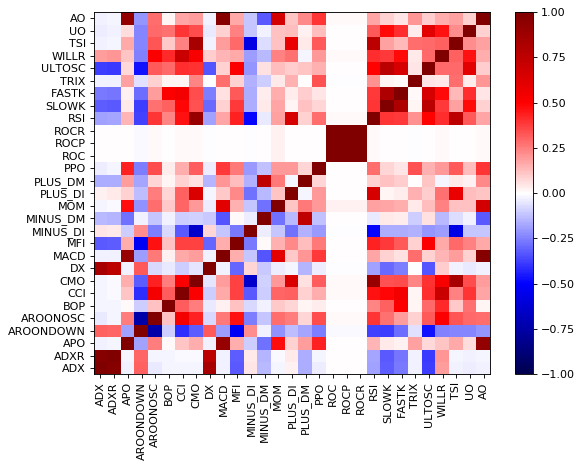

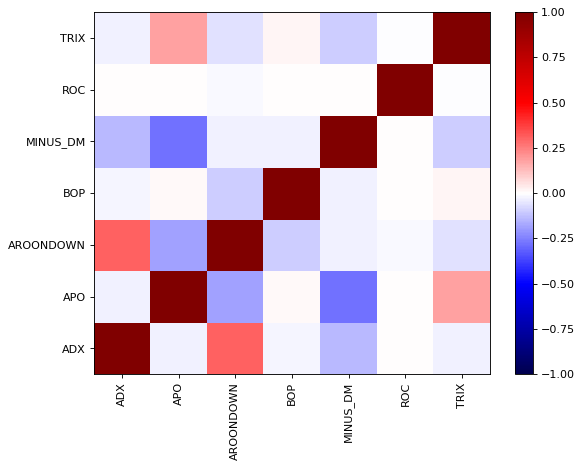

In [19]:
df = momentum_df

plot_correlation(df.corr())

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.4)]

# Drop features 
df = df.drop(df[to_drop], axis=1)
momentum_lowcorr_feats = df.columns
print(momentum_lowcorr_feats)
plot_correlation(df.corr())

#### Overlap

Index(['BBH', 'SAREXT'], dtype='object')


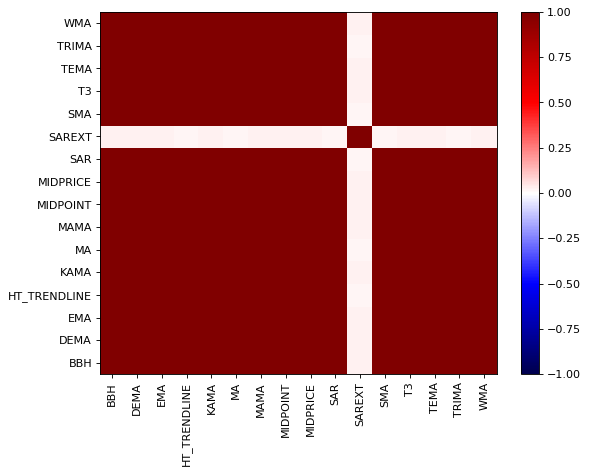

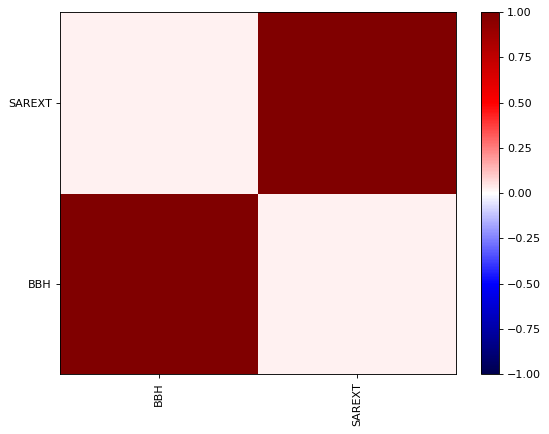

In [21]:
df = overlap_df

plot_correlation(df.corr())

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df = df.drop(df[to_drop], axis=1)
overlap_lowcorr_feats = df.columns
print(overlap_lowcorr_feats)
plot_correlation(df.corr())

#### Trend

Index(['VIP', 'VIN', 'MI', 'DPO', 'KST'], dtype='object')


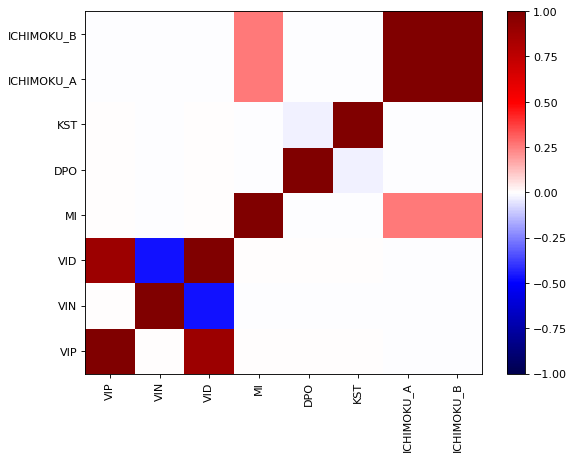

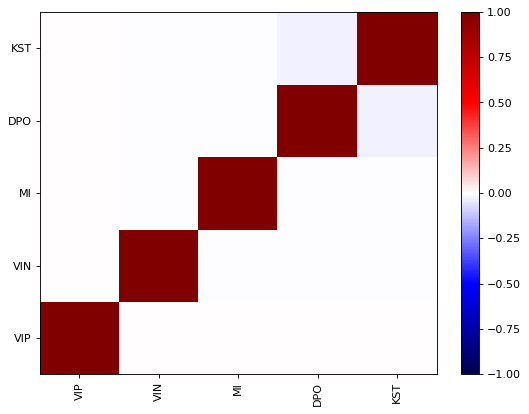

In [22]:
df = trend_df

plot_correlation(df.corr())

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.25)]

# Drop features 
df = df.drop(df[to_drop], axis=1)
trend_lowcorr_feats = df.columns
print(trend_lowcorr_feats)
plot_correlation(df.corr())

#### Pattern Recognition

Index(['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE',
       'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS',
       'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLCONCEALBABYSWALL',
       'CDLMATHOLD', 'CDLUPSIDEGAP2CROWS'],
      dtype='object')


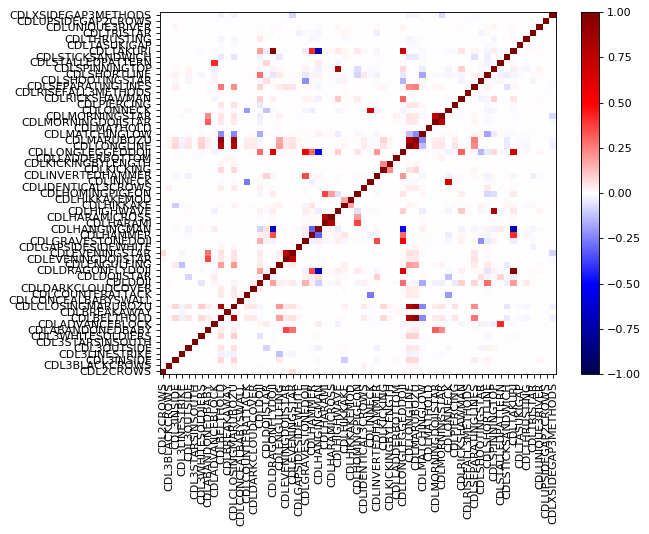

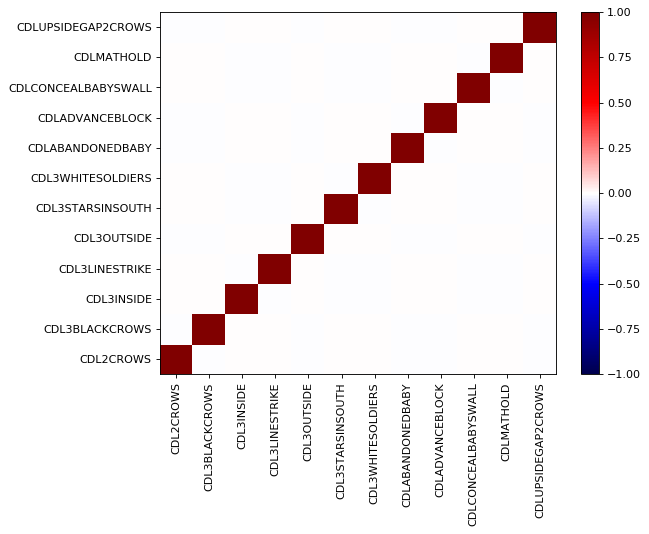

In [23]:
df = pattern_df

plot_correlation(df.corr())

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.01)]

# Drop features 
df = df.drop(df[to_drop], axis=1)
pattern_lowcorr_feats = df.columns
print(pattern_lowcorr_feats)
plot_correlation(df.corr())

#### Volatility Indicator Functions

Index(['ATR', 'NATR', 'KCHI'], dtype='object')


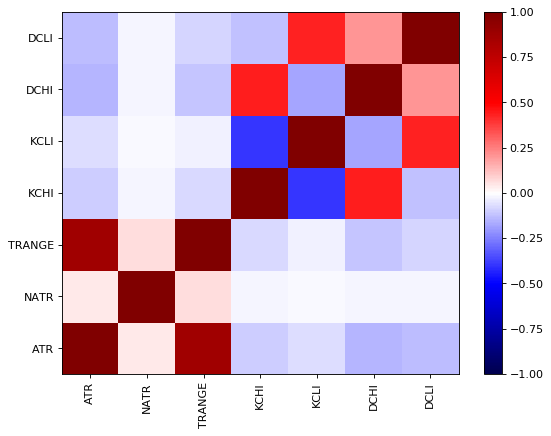

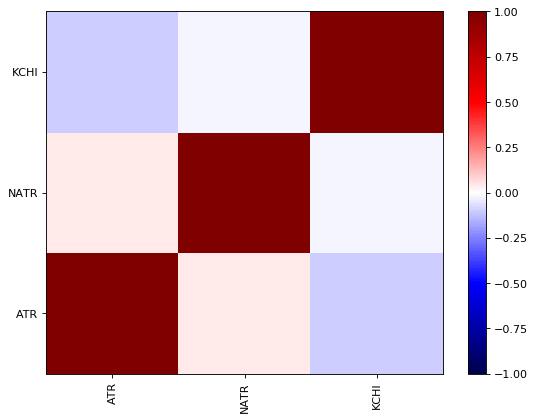

In [24]:
df = volatility_df

plot_correlation(df.corr())

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.25)]

# Drop features 
df = df.drop(df[to_drop], axis=1)
volatility_lowcorr_feats = df.columns
print(volatility_lowcorr_feats)
plot_correlation(df.corr())

#### Volume Indicator Functions

Index(['AD', 'ADOSC', 'FI', 'EM', 'VPT'], dtype='object')


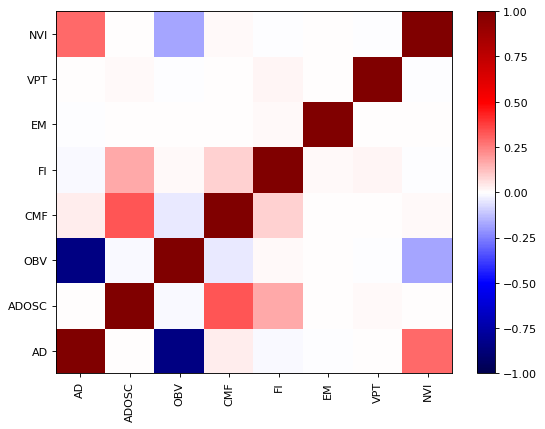

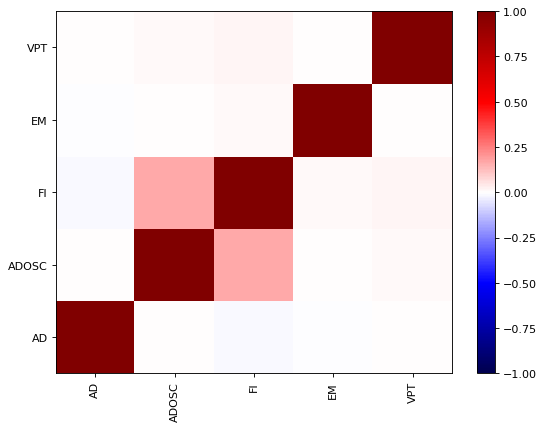

In [25]:
df = volume_df

plot_correlation(df.corr())

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.25)]

# Drop features 
df = df.drop(df[to_drop], axis=1)
volume_lowcorr_feats = df.columns
print(volume_lowcorr_feats)
plot_correlation(df.corr())

### Merge features in one DataFrame

In [29]:
for feat in [momentum_lowcorr_feats, 
             overlap_lowcorr_feats, 
             trend_lowcorr_feats, 
             pattern_lowcorr_feats, 
             volatility_lowcorr_feats,
             volume_lowcorr_feats]:
    print(feat.values)

['ADX' 'APO' 'AROONDOWN' 'BOP' 'MINUS_DM' 'ROC' 'TRIX']
['BBH' 'SAREXT']
['VIP' 'VIN' 'MI' 'DPO' 'KST']
['CDL2CROWS' 'CDL3BLACKCROWS' 'CDL3INSIDE' 'CDL3LINESTRIKE' 'CDL3OUTSIDE'
 'CDL3STARSINSOUTH' 'CDL3WHITESOLDIERS' 'CDLABANDONEDBABY'
 'CDLADVANCEBLOCK' 'CDLCONCEALBABYSWALL' 'CDLMATHOLD' 'CDLUPSIDEGAP2CROWS']
['ATR' 'NATR' 'KCHI']
['AD' 'ADOSC' 'FI' 'EM' 'VPT']


In [27]:
feats_df = pd.concat([
    momentum_df[momentum_lowcorr_feats],
    overlap_df[overlap_lowcorr_feats],
    trend_df[trend_lowcorr_feats],
    pattern_df[pattern_lowcorr_feats], 
    volatility_df[volatility_lowcorr_feats],
    volume_df[volume_lowcorr_feats]], axis=1)